In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mh = pd.read_csv('../data/raw/messy_housing_data.csv')

print(mh.head())
print(mh.info())


   area_sqft  bedrooms  bathrooms  year_built       price       location
0       2696       4.0          1      1962.0  2068779.98         austin
1       2017       6.0          4      2008.0  1539208.46  San Francisco
2       1592       3.0          3      1991.0    557909.7  San Francisco
3       3358       2.0          4      1914.0         NaN        chicago
4       1624       2.0          5      1935.0   716945.96  New York City
<class 'pandas.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_sqft   420 non-null    int64  
 1   bedrooms    399 non-null    float64
 2   bathrooms   420 non-null    int64  
 3   year_built  384 non-null    float64
 4   price       370 non-null    str    
 5   location    420 non-null    str    
dtypes: float64(2), int64(2), str(2)
memory usage: 19.8 KB
None


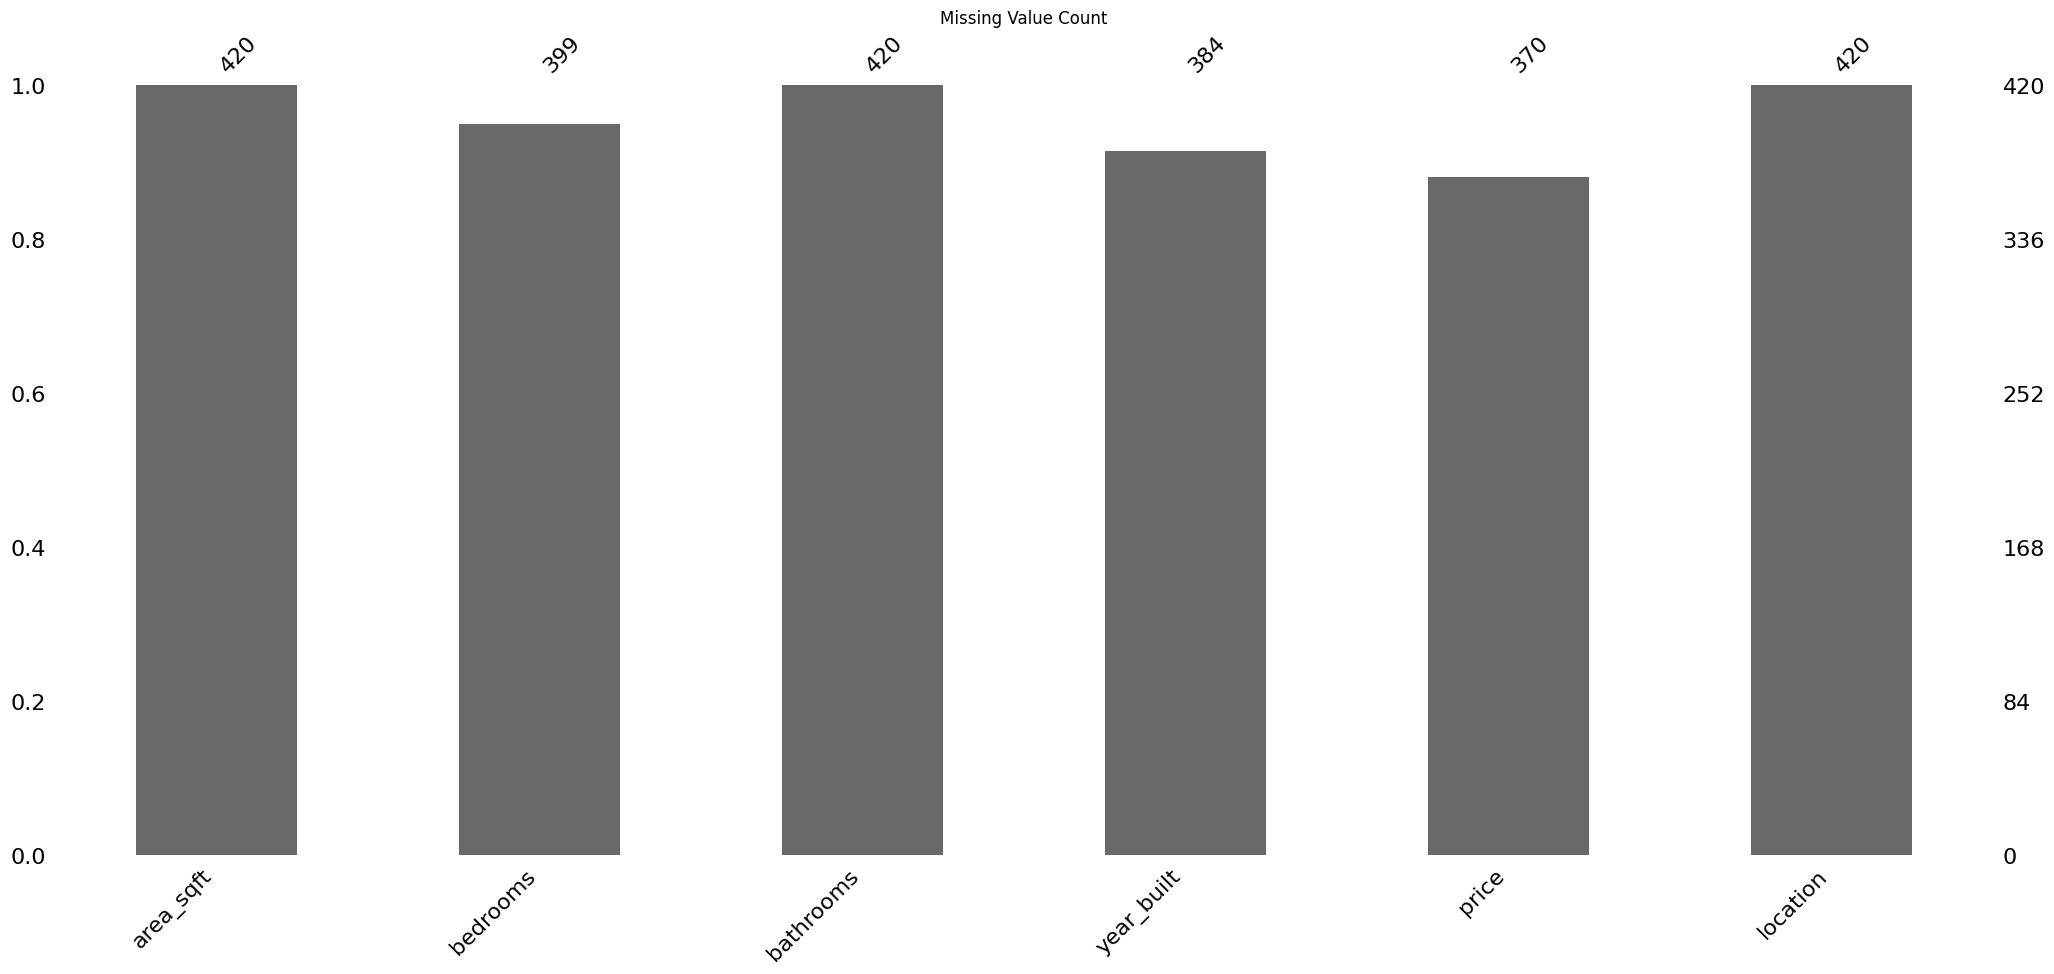

In [26]:
import missingno as ms

ms.bar(mh)
plt.title("Missing Value Count")
plt.show()


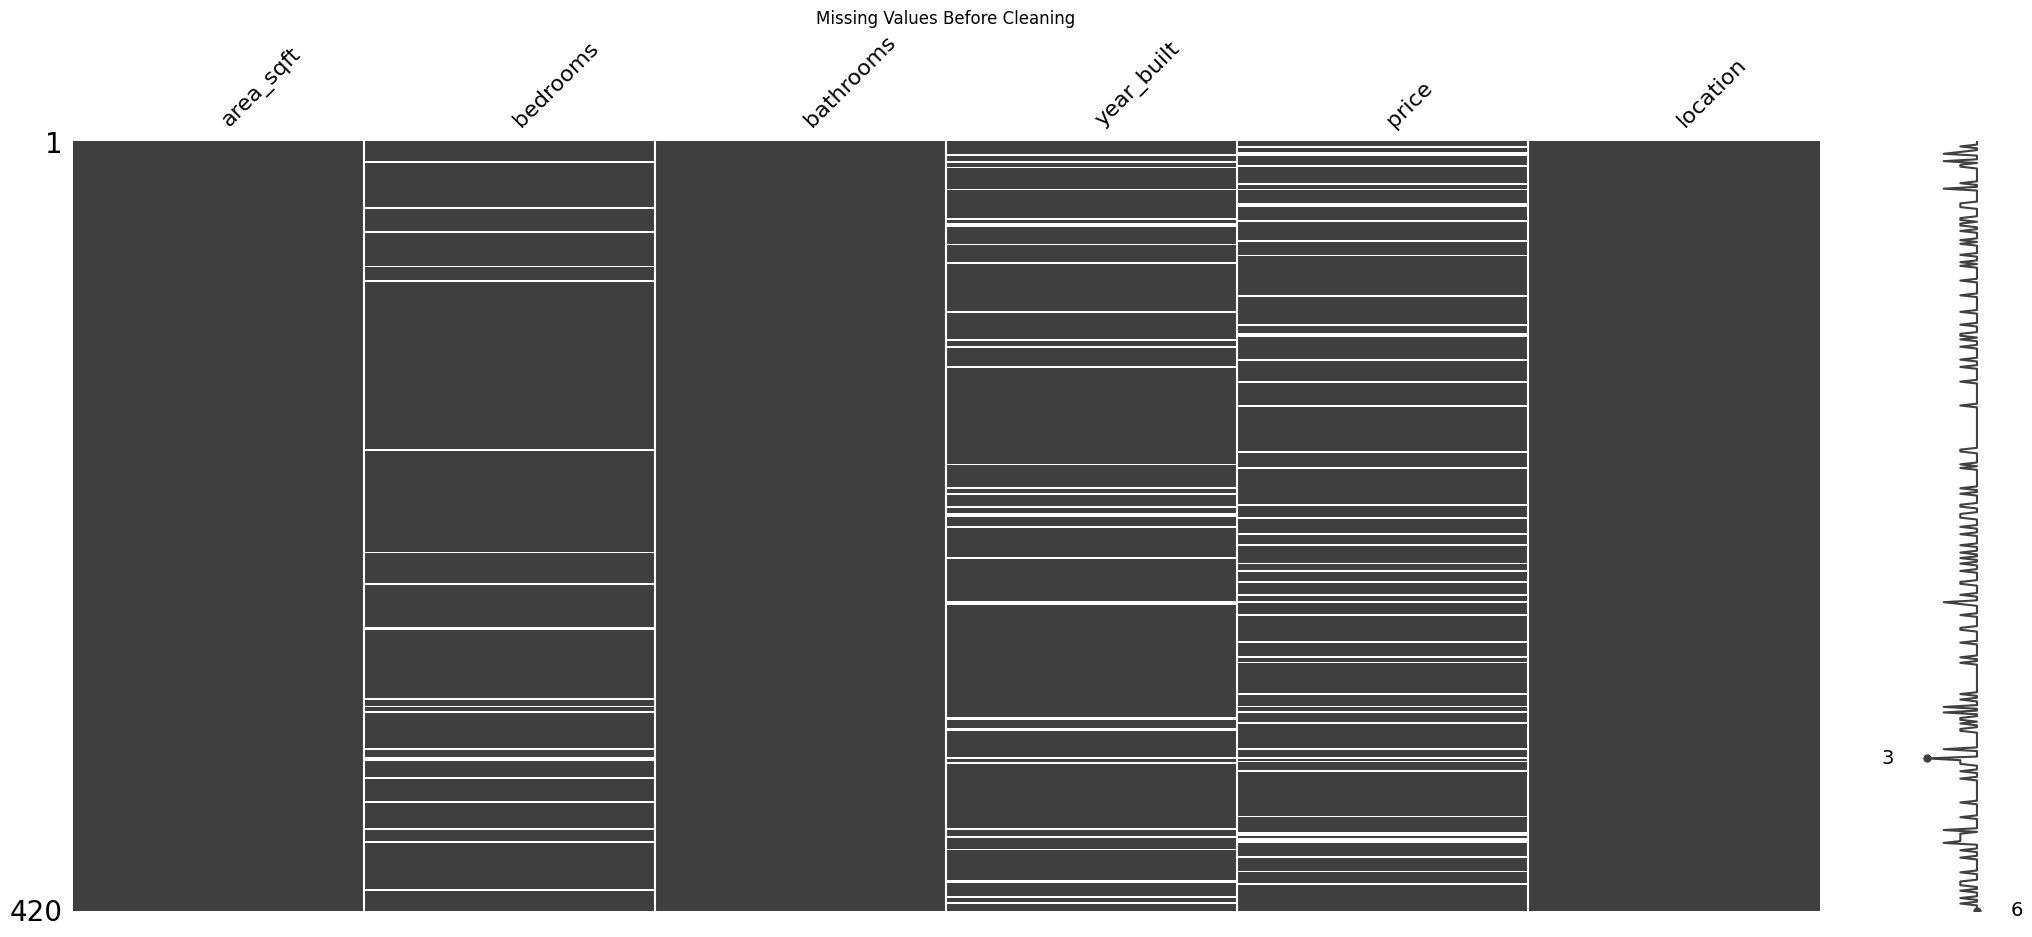

In [27]:
ms.matrix(mh)
plt.title("Missing Values Before Cleaning")
plt.show()

In [29]:
print(mh.dtypes)

area_sqft       int64
bedrooms      float64
bathrooms       int64
year_built    float64
price             str
location          str
dtype: object


In [30]:
print("Bedrooms with 0:", (mh['bedrooms'] == 0).sum())
print("Bathrooms with 0:", (mh['bathrooms'] == 0).sum())


Bedrooms with 0: 0
Bathrooms with 0: 0


In [31]:
print("Duplicate rows:", mh.duplicated().sum())


Duplicate rows: 20


In [32]:
print(mh['location'].unique())


<StringArray>
[        'austin',  'San Francisco',        'chicago',  'New York City',
        'Chicago',          'miami',  'san francisco',             'LA',
           'l.a.',        'AUSTIN ',         'Austin',   'Los Angeles ',
            'La ',       'Chicago ',             'SF',         'boston',
         'Chicgo',            'nyc',         'Boston',    'Los Angeles',
    'los angeles',            'NYC',  'New York city',  'NEW YORK CITY',
   'LOS ANGELES ',        'Austin ',             'sf', 'San Francisco ',
           'L.A.',          'Miami',         'Bostan',        'Boston ',
         'Miami ',  'SAN FRANCISCO',          'L.A. ',            'Sf ',
 'New York City ',         'BOSTON',       'CHICAGO ',           'Nyc ',
        'CHICAGO',         'AUSTIN',          'MIAMI']
Length: 43, dtype: str


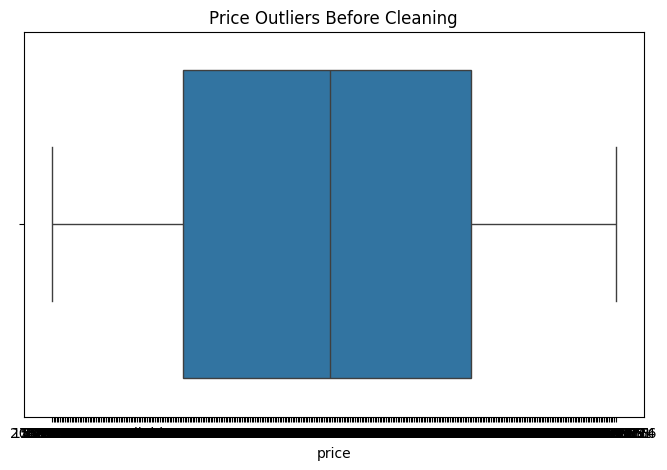

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x=mh['price'])
plt.title("Price Outliers Before Cleaning")
plt.show()


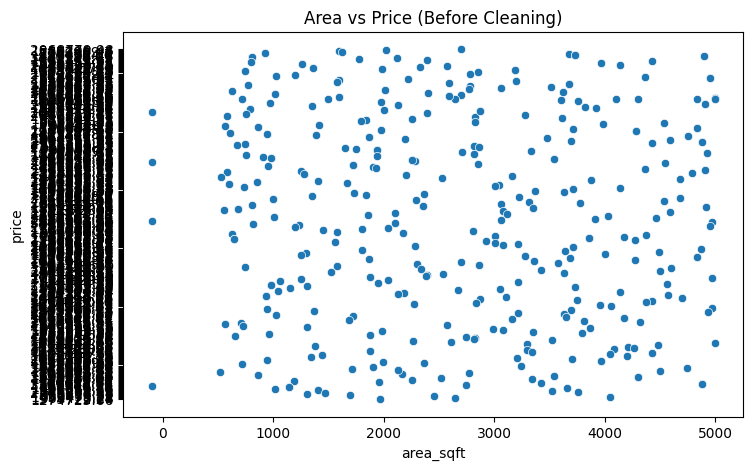

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=mh['area_sqft'], y=mh['price'])
plt.title("Area vs Price (Before Cleaning)")
plt.show()


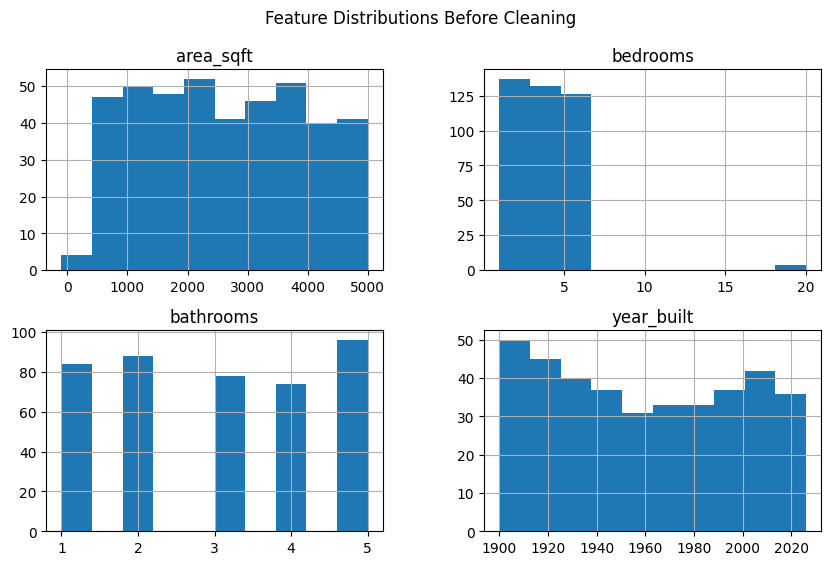

In [35]:
mh.hist(figsize=(10,6))
plt.suptitle("Feature Distributions Before Cleaning")
plt.show()


In [39]:
# After cleaning dataset
raw_df = pd.read_csv('../data/raw/messy_housing_data.csv')
clean_df = pd.read_csv('../data/cleaned/housing_cleaned.csv')


In [40]:
raw_df.isnull().sum()
clean_df.isnull().sum()

area_sqft         0
bedrooms          0
bathrooms         0
year_built        0
price             0
location          0
house_age         0
price_per_sqft    0
dtype: int64

In [41]:
print("Raw shape:", raw_df.shape)
print("Clean shape:", clean_df.shape)


Raw shape: (420, 6)
Clean shape: (297, 8)


In [42]:
print("Raw duplicates:", raw_df.duplicated().sum())
print("Clean duplicates:", clean_df.duplicated().sum())


Raw duplicates: 20
Clean duplicates: 0


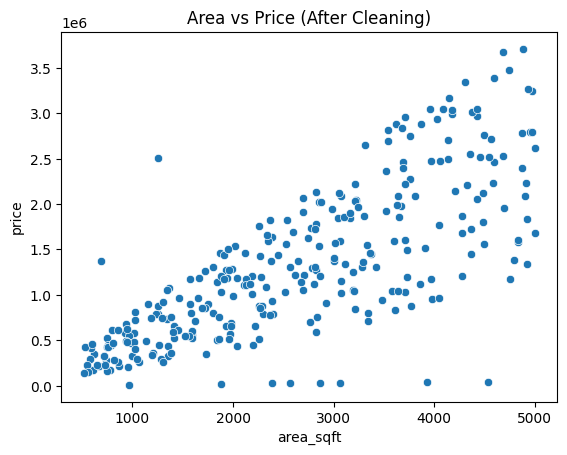

In [43]:
sns.scatterplot(data=clean_df, x="area_sqft", y="price")
plt.title("Area vs Price (After Cleaning)")
plt.show()

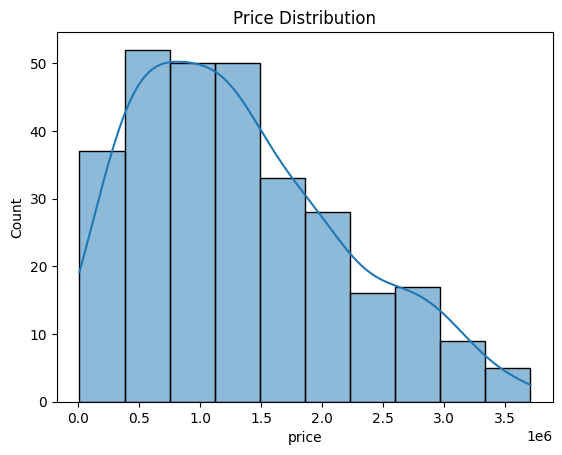

In [45]:
sns.histplot(clean_df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

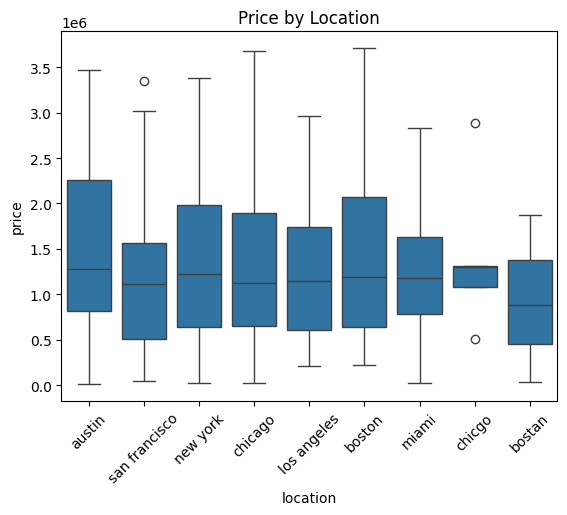

In [46]:
sns.boxplot(data=clean_df, x="location", y="price")
plt.xticks(rotation=45)
plt.title("Price by Location")
plt.show()

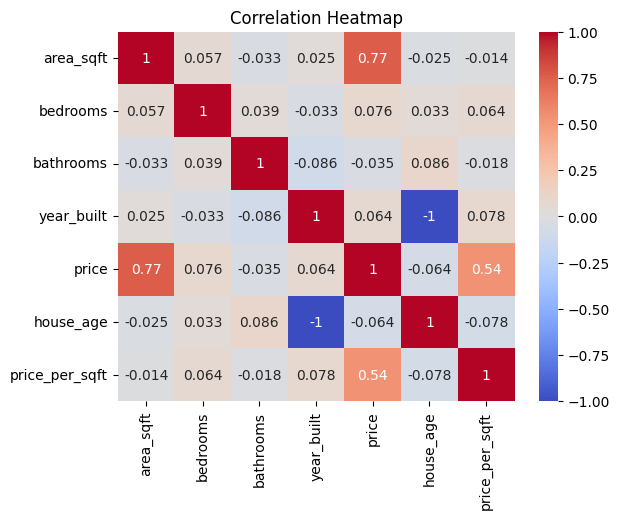

In [47]:
sns.heatmap(clean_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [48]:
print(clean_df.head())
print(clean_df.info())

   area_sqft  bedrooms  bathrooms  year_built       price       location  \
0       2696       4.0          1      1962.0  2068779.98         austin   
1       2017       6.0          4      2008.0  1539208.46  san francisco   
2       1592       3.0          3      1991.0   557909.70  san francisco   
3       1624       2.0          5      1935.0   716945.96       new york   
4        924       2.0          4      1972.0   574438.17        chicago   

   house_age  price_per_sqft  
0       64.0      767.351625  
1       18.0      763.117729  
2       35.0      350.445791  
3       91.0      441.469187  
4       54.0      621.686331  
<class 'pandas.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_sqft       297 non-null    int64  
 1   bedrooms        297 non-null    float64
 2   bathrooms       297 non-null    int64  
 3   year_built      297 non-null    fl

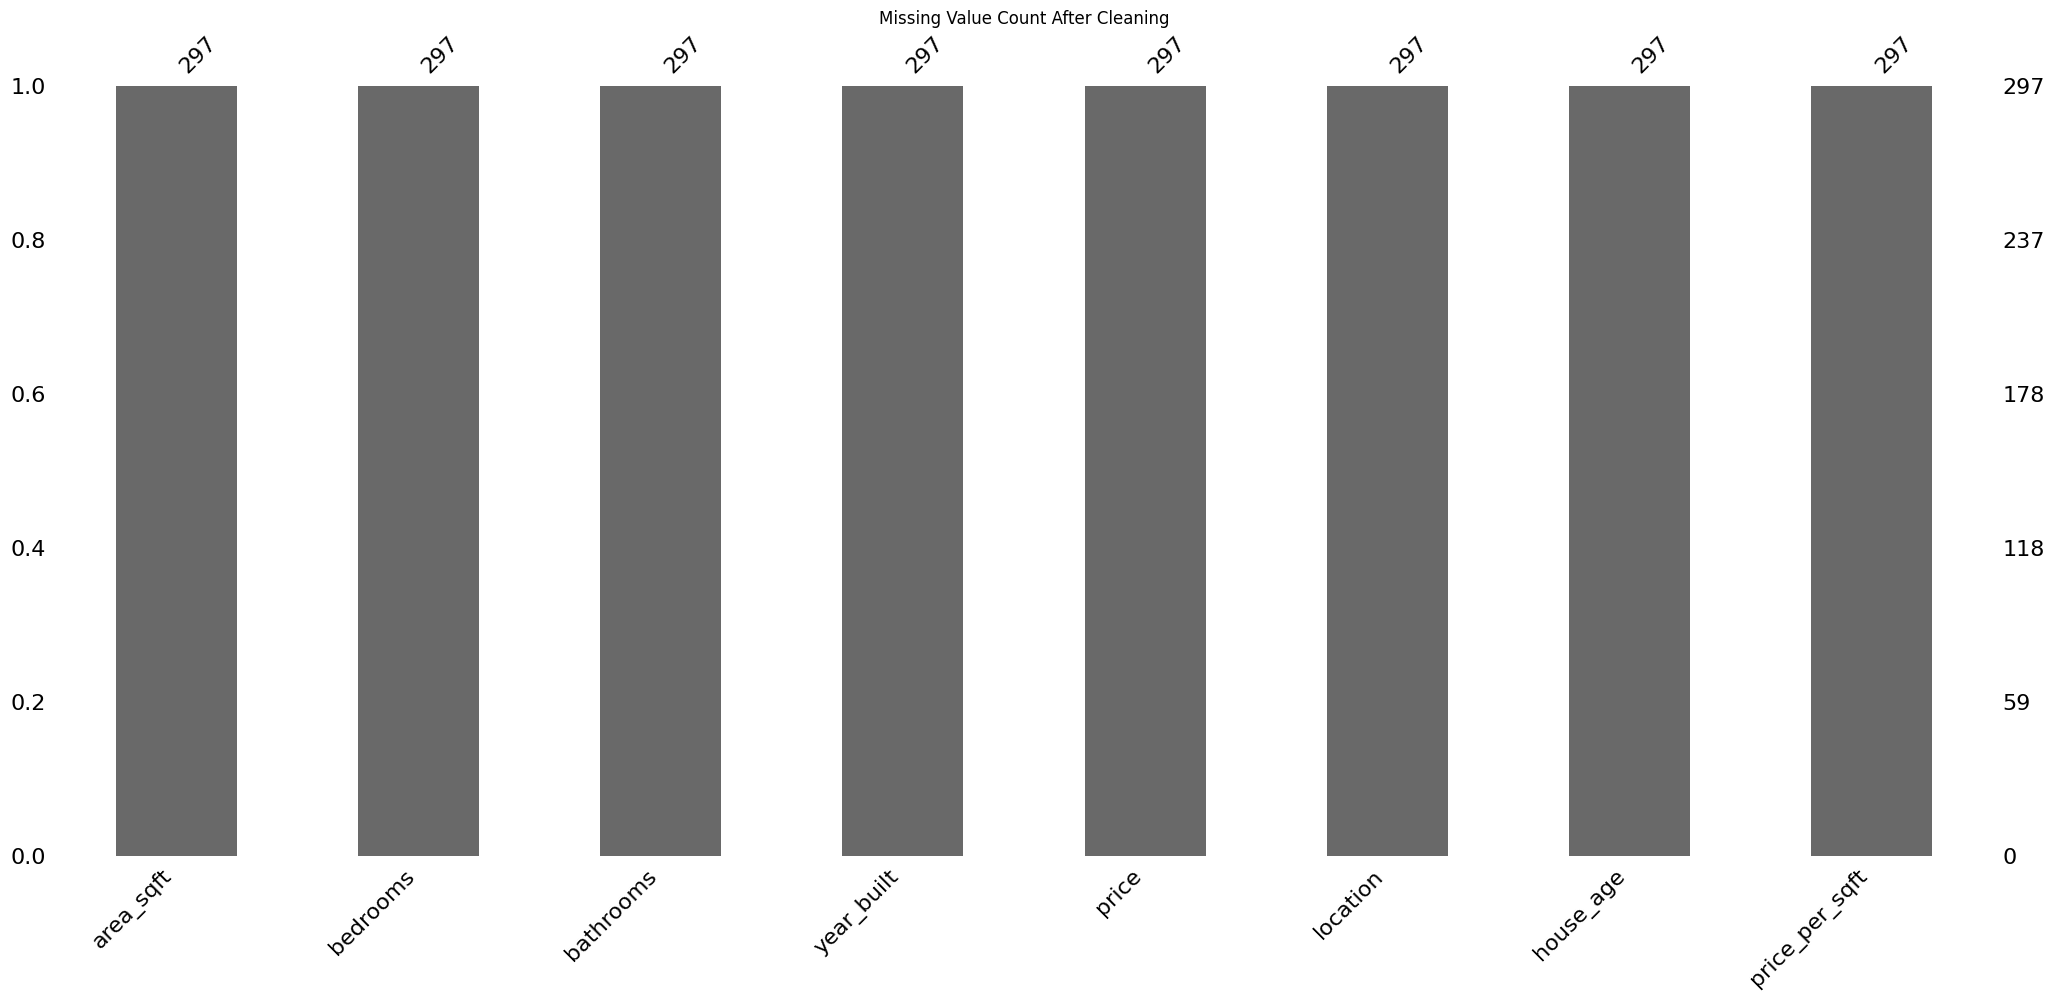

In [49]:
ms.bar(clean_df)
plt.title("Missing Value Count After Cleaning")
plt.show()

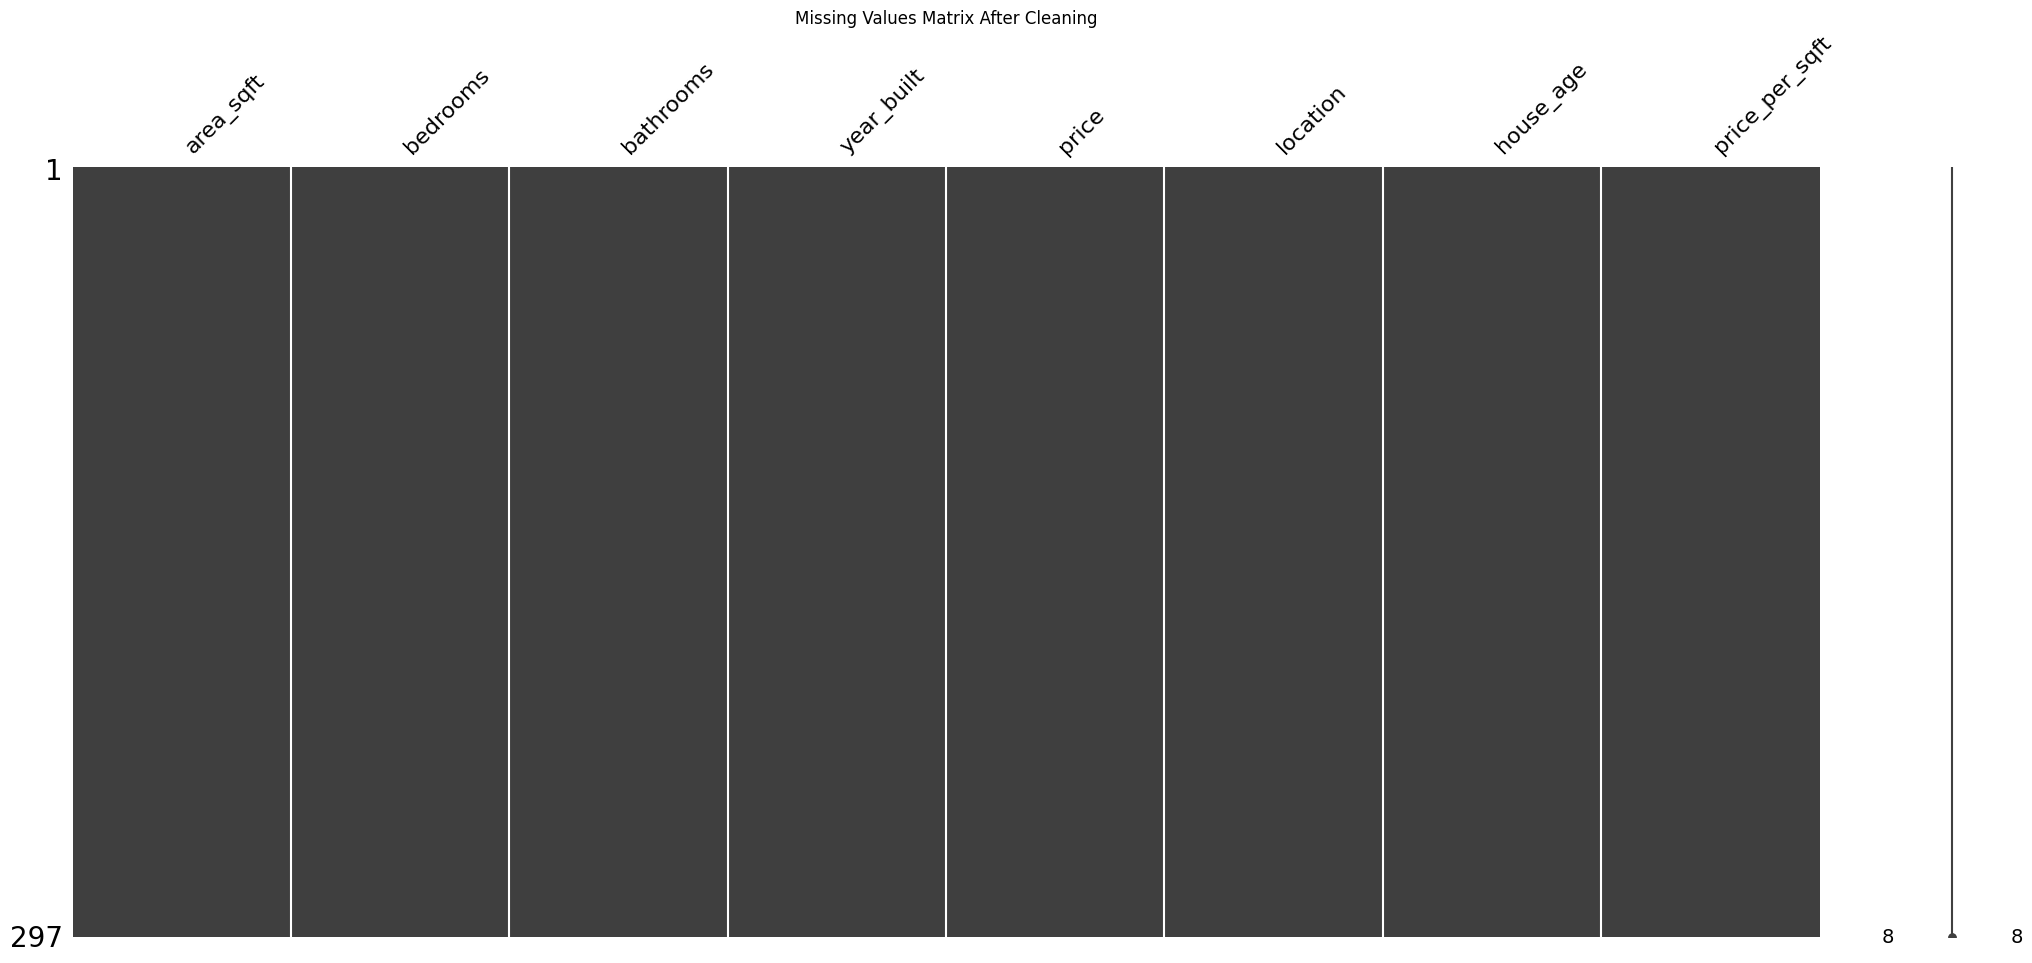

In [50]:
ms.matrix(clean_df)
plt.title("Missing Values Matrix After Cleaning")
plt.show()

In [51]:
print(clean_df.dtypes)

area_sqft           int64
bedrooms          float64
bathrooms           int64
year_built        float64
price             float64
location              str
house_age         float64
price_per_sqft    float64
dtype: object


In [52]:
print(clean_df["location"].unique())

<StringArray>
[       'austin', 'san francisco',      'new york',       'chicago',
   'los angeles',        'boston',         'miami',        'chicgo',
        'bostan']
Length: 9, dtype: str


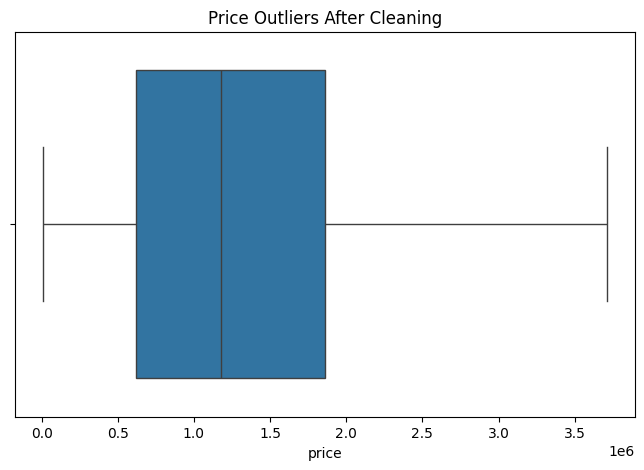

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x=clean_df["price"])
plt.title("Price Outliers After Cleaning")
plt.show()